<a href="https://colab.research.google.com/github/Karanam14/Projects.github.io/blob/main/EDA_on_Temperature_Readings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OVERVIEW**

This dataset has temperature readings of an entreprise building room, both iniside and outside the building at random intervals. The recording speed was per second.

Dataset details:

id : unique IDs for each reading

room_id/id : room id in which device was installed.

noted_date : date and time of reading

temp : temperature readings

out/in : whether reading was taken from device installed inside or outside of room

Task Completed:

Variance of temp for inside - outside room temp?

How outside temp was related to inside temp?

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IOT-temp.csv to IOT-temp.csv


In [3]:
data = pd.read_csv("IOT-temp.csv")
data.sample(10)

,id,room_id/id,noted_date,temp,out/in
70631,__export__.temp_log_133398_9a0204e5,Room Admin,11-09-2018 12:45,34,In
57898,__export__.temp_log_126119_0d5c4776,Room Admin,13-09-2018 08:28,34,Out
64658,__export__.temp_log_104587_e622b05a,Room Admin,11-09-2018 22:44,28,Out
35010,__export__.temp_log_58155_1c9e3eb3,Room Admin,17-10-2018 18:30,39,Out
15086,__export__.temp_log_104624_489ddaa8,Room Admin,03-11-2018 13:42,46,Out
22132,__export__.temp_log_74537_e3f8700c,Room Admin,18-10-2018 15:25,41,Out
89568,__export__.temp_log_125664_511c89a1,Room Admin,06-09-2018 11:28,29,Out
6775,__export__.temp_log_173784_6ded058d,Room Admin,02-12-2018 04:04,36,Out
52632,__export__.temp_log_36097_2574d357,Room Admin,30-09-2018 12:37,48,Out
68788,__export__.temp_log_93752_f92ec363,Room Admin,11-09-2018 16:45,31,In


In [4]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [5]:
data.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [6]:
data.shape

(97606, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [8]:
data.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [9]:
df = data.drop(['id','room_id/id'],axis=1)
df.head()

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In


In [10]:
data.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [11]:
date=[]
time=[]
for i in df['noted_date']:
    date.append(i.split(' ')[0])
    time.append(i.split(' ')[1])
df['date']=date
df['time']=time

In [12]:
df.drop('noted_date',axis=1,inplace=True)
df.head()

,temp,out/in,date,time
0,29,In,08-12-2018,09:30
1,29,In,08-12-2018,09:30
2,41,Out,08-12-2018,09:29
3,41,Out,08-12-2018,09:29
4,31,In,08-12-2018,09:29


In [13]:
df[['outside','inside']]=pd.get_dummies(df['out/in'])
df.rename(columns = {'out/in':'location'}, inplace = True)

In [14]:
print('Total Inside Observations  :',len([i for i in df['inside'] if  i == 1]))
print('Total Outside Observations :',len([i for i in df['inside'] if  i == 0]))

Total Inside Observations  : 77261
Total Outside Observations : 20345


In [15]:
try:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day
    df.drop('date',axis=1,inplace=True)
except:
    print('Operations already performed')
df.head()

,temp,location,time,outside,inside,year,month,day
0,29,In,09:30,1,0,2018,8,12
1,29,In,09:30,1,0,2018,8,12
2,41,Out,09:29,0,1,2018,8,12
3,41,Out,09:29,0,1,2018,8,12
4,31,In,09:29,1,0,2018,8,12


In [16]:
print("Days of observation   : ",sorted(df['day'].unique()))
print("Months of observation : ",sorted(df['month'].unique()))
print("Year of observation   : ",sorted(df['year'].unique()))

Days of observation   :  [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Months of observation :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Year of observation   :  [2018]


In [17]:
print("Temperature -> \n"+"-"*30)
print("\tTotal Count    = ",df['temp'].shape[0])
print("\tMinimum Value  = ",df['temp'].min())
print("\tMaximum Value  = ",df['temp'].max())
print("\tMean Value     = ",df['temp'].mean())
print("\tStd dev Value  = ",df['temp'].std())
print("\tVariance Value = ",df['temp'].var())

Temperature -> 
------------------------------
	Total Count    =  97606
	Minimum Value  =  21
	Maximum Value  =  51
	Mean Value     =  35.05393111079237
	Std dev Value  =  5.699825337585307
	Variance Value =  32.48800887897946


In [18]:
df = df[['day','month','year','time','temp','location','outside','inside']]
df.head()

,day,month,year,time,temp,location,outside,inside
0,12,8,2018,09:30,29,In,1,0
1,12,8,2018,09:30,29,In,1,0
2,12,8,2018,09:29,41,Out,0,1
3,12,8,2018,09:29,41,Out,0,1
4,12,8,2018,09:29,31,In,1,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


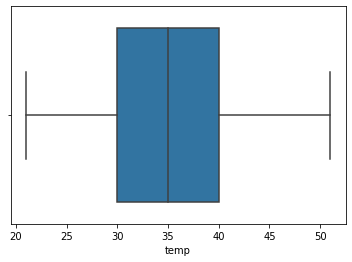

In [19]:
sns.boxplot(df['temp'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


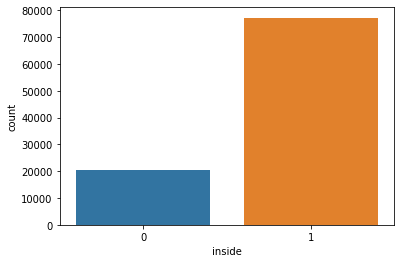

In [20]:
sns.countplot(df['inside'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


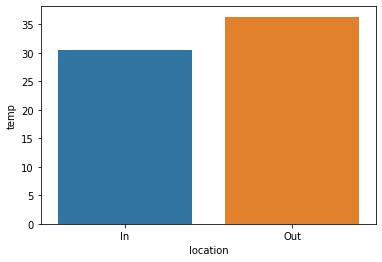

In [21]:
sns.barplot(df['location'],df['temp'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


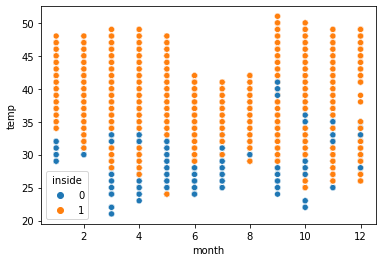

In [22]:
sns.scatterplot(df['month'],df['temp'],hue=df['inside'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


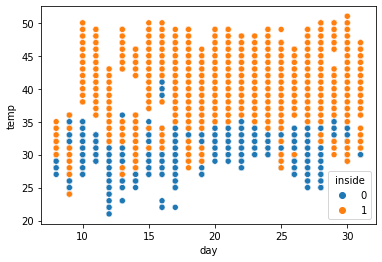

In [23]:
sns.scatterplot(df['day'],df['temp'],hue=df['inside'])

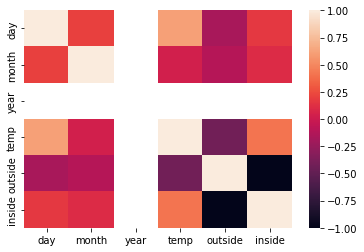

In [24]:
sns.heatmap(df.corr())

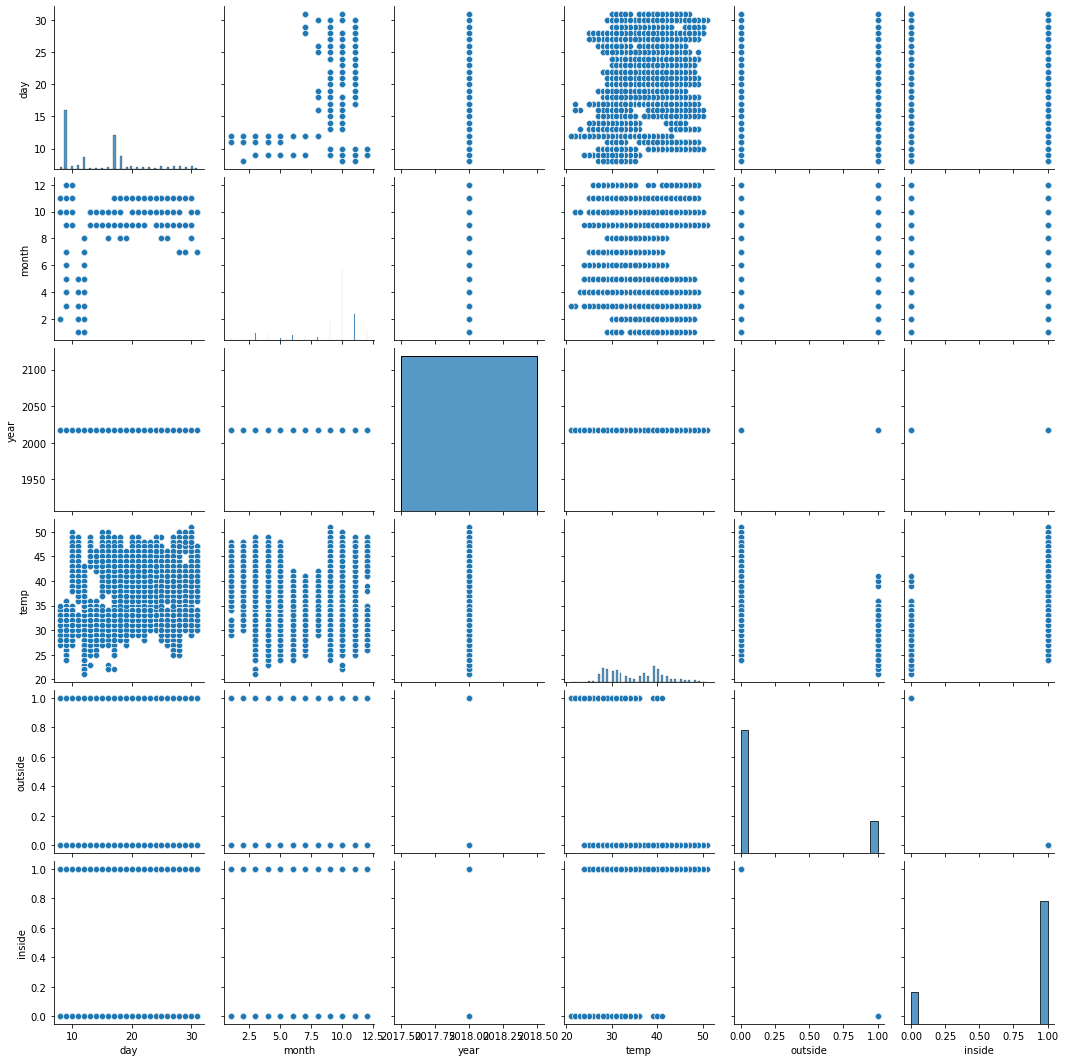

In [25]:
sns.pairplot(df)

In [26]:
arr = df['inside']
x=[]
y=[]
for i in arr:
    if i==1:
        x.append(i)
    else :
        y.append(i)
x=pd.Series(x)
y=pd.Series(y)
type(arr)

pandas.core.series.Series

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location v/s Temp')

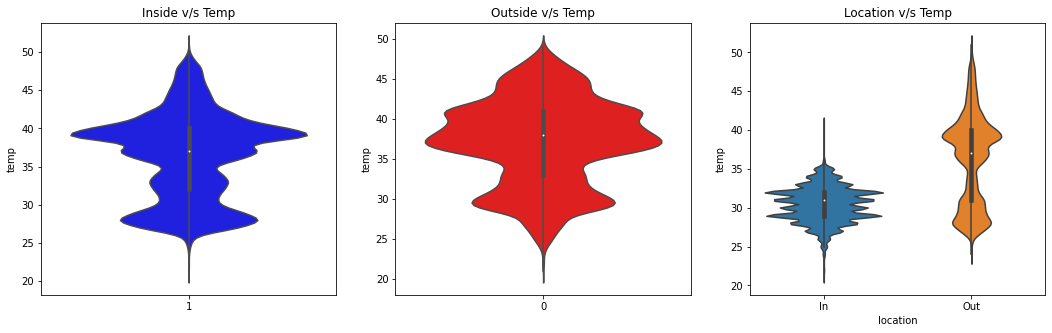

In [27]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.violinplot(x,df['temp'],ax=axes[0],color='b').set_title("Inside v/s Temp")
sns.violinplot(y,df['temp'],ax=axes[1],color='r').set_title("Outside v/s Temp")
sns.violinplot(df['location'],df['temp'],ax=axes[2]).set_title("Location v/s Temp")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


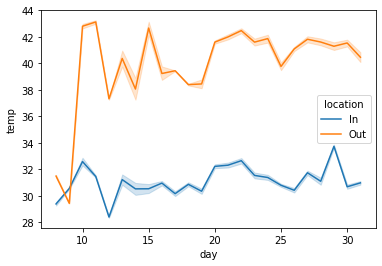

In [28]:
sns.lineplot(df['day'],df['temp'],hue=df['location'])